# Learning Curve 1

### Obtención de datos

Inicialmente importamos la librería necesaria

In [1]:
import numpy as np
import pandas as pd
import os

Los datos en formato CSV ( pulsar_stars.csv ) se pueden obtener de: https://www.kaggle.com/sharansmenon/pulsar-star-pytorch/data.

In [13]:
data = pd.read_csv("/home/anell/Projects/Pulsar-NN/pulsar_stars.csv")

In [14]:
data

,Mean-of-the-integrated-profile,Standard-deviation-of the-integrated-profile,Excess-kurtosis-of-the-integrated-profile,Skewness-of-the-integrated-profile,Mean-of-the-DM-SNR-curve,Standard-deviation-of-the-DM-SNR-curve,Excess-kurtosis-of-the-DM-SNR-curve,Skewness-of-the-DM-SNR-curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


Para generar un buen entrenamiento, es necesario que los datos que se encuentren distribuidos lo más uniformemente posible. Debido a esto utilizaremos la herramienta sample() de pandas que desordena aleatoriamente la muestra entregada.

In [15]:
data = data.sample(frac=1)  
data

,Mean-of-the-integrated-profile,Standard-deviation-of the-integrated-profile,Excess-kurtosis-of-the-integrated-profile,Skewness-of-the-integrated-profile,Mean-of-the-DM-SNR-curve,Standard-deviation-of-the-DM-SNR-curve,Excess-kurtosis-of-the-DM-SNR-curve,Skewness-of-the-DM-SNR-curve,target_class
17187,128.171875,50.562169,-0.179668,-0.038752,2.477425,15.907981,8.852441,96.572770,0
13392,131.101562,52.347523,-0.123295,-0.261854,2.840301,16.870114,8.914690,97.017641,0
12024,128.210938,53.812704,-0.109997,-0.369826,1.222408,11.185680,14.370832,263.346263,0
14867,117.078125,48.120391,0.297434,0.071806,2.679766,19.446745,9.020115,93.032750,0
1451,131.945312,48.760145,-0.170860,-0.286805,2.846154,17.445608,8.064323,78.326687,0
...,...,...,...,...,...,...,...,...,...
573,101.445312,46.867134,0.614529,0.680234,2.602843,18.666595,8.855482,86.230342,0
8770,126.507812,54.702033,0.311723,-0.235454,3.146321,17.500822,8.550791,90.934071,0
14784,91.976562,35.280010,0.798026,2.825496,1.343645,14.519442,12.479326,168.619690,0
3454,101.976562,42.268943,0.455155,0.739002,1.964883,12.217460,11.273192,179.986000,0


Ahora pasamos los datos a listas y separamos en dos conjuntos de datos: set de entrenamiento y set de testeo

In [17]:
ejemplos = data.values.tolist()
ejemplos = np.array(ejemplos)

features = ejemplos.transpose()

In [18]:
X = features[0:8]
Y = features[8]

X = X.transpose()

In [19]:
X_train = X[0:14000]
Y_train = Y[0:14000]

X_cv = X[14000:]
Y_cv = Y[14000:]

In [22]:
X_train.shape, Y_train.shape, X_cv.shape, Y_cv.shape

((14000, 8), (14000,), (3898, 8), (3898,))

### Entrenamiento de la red neuronal

Importamos la libreria necesaria

In [30]:
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, Flatten
from keras.layers.core import Lambda, RepeatVector, Reshape
#from keras.layers.convolutional import Conv2D, Conv2DTranspose
#from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
#from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam, SGD
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix

Primero armamos la red neuronal

In [31]:
inputs = Input(shape=(8,))

x = Dense(2)(inputs)
x = Activation("relu")(x)

x = Dense(1)(x)
x = Activation("sigmoid")(x)


model = Model(inputs, x)


# Compilación del modelo:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


Ahora entrenamos nuestra red neuronal

In [32]:
model.fit(X_train, Y_train, epochs=20, batch_size=10)  

Epoch 1/20
14000/14000 [==============================] - 23s 2ms/step - loss: 3.2115 - accuracy: 0.8291
Epoch 2/20
14000/14000 [==============================] - 19s 1ms/step - loss: 0.3225 - accuracy: 0.9424
Epoch 3/20
14000/14000 [==============================] - 20s 1ms/step - loss: 0.2136 - accuracy: 0.9519
Epoch 4/20
14000/14000 [==============================] - 22s 2ms/step - loss: 0.1511 - accuracy: 0.9640
Epoch 5/20
14000/14000 [==============================] - 22s 2ms/step - loss: 0.1137 - accuracy: 0.9721
Epoch 6/20
14000/14000 [==============================] - 22s 2ms/step - loss: 0.1009 - accuracy: 0.9737
Epoch 7/20
14000/14000 [==============================] - 22s 2ms/step - loss: 0.0950 - accuracy: 0.9740
Epoch 8/20
14000/14000 [==============================] - 23s 2ms/step - loss: 0.0922 - accuracy: 0.9752
Epoch 9/20
14000/14000 [==============================] - 20s 1ms/step - loss: 0.0904 - accuracy: 0.9756
Epoch 10/20
14000/14000 [==============================

Evaluamos el modelo para el conjunto de entrenamiento y el de validación cruzada:

In [33]:
# evaluación del modelo para el conjunto de entrenamiento
J_train, accuracy_train = model.evaluate(X_train, Y_train)
print('Accuracy train: %.2f' % (accuracy_train*100))

14000/14000 [==============================] - 4s 311us/step
Accuracy train: 97.57


In [34]:
# evaluación del modelo para el conjunto de validación cruzada
J_cv, accuracy_cv = model.evaluate(X_cv, Y_cv)
print('Accuracy CV: %.2f' % (accuracy_cv*100))

3898/3898 [==============================] - 1s 218us/step
Accuracy CV: 97.33


### Predicciones

In [39]:
prediccion_train = model.predict(X_train) #sin aproximar
prediccion_final_train = [round(x[0]) for x in prediccion_train] #aproxima a 1 o a 0


prediccion_cv = model.predict(X_cv) #sin aproximar
prediccion_final_cv = [round(x[0]) for x in prediccion_cv] #aproxima a 1 o a 0

Ahora evualamos el rendimiento utilizando una metriz de confusión.

In [40]:
confusion_matrix(Y_train,prediccion_final_train)

array([[12673,    52],
       [  288,   987]])

De la matriz de confusión del set de entrenamiento (tamaño igual a 14000) podemos ver que el modelo presentó 12673 verdaderos negativos (estrellas que no son púlsares las predice como no púlsares), 52 falsos positivo (estrellas que no son púlsares las predice como púlsares), 288 falsos negativos (estrellas que son púlsares las predice como no púlsares) y 987 verdaderos positivos (estrella púlsares las predice como púlsares)

In [41]:
confusion_matrix(Y_cv,prediccion_final_cv)

array([[3516,   18],
       [  86,  278]])

De la matriz de confusión del set de validación (tamaño igual a 3898) podemos ver que el modelo presentó 3516 verdaderos negativos (estrellas que no son púlsares las predice como no púlsares), 18 falsos positivo (estrellas que no son púlsares las predice como púlsares), 86 falsos negativos (estrellas que son púlsares las predice como no púlsares) y 278 verdaderos positivos (estrella púlsares las predice como púlsares)

En general, podemos decir que la precisión  global del modelo es alta, presentando un 97.57% de precisión para el set de entrenamiento y un 97.33% para el set de validación cruzada. Sin embargo, mediante la utilización de las matrices de confusión notamos que la tasa de identificación de pulsares es baja, para el set de entrenamiento esta tasa resultó ser 987/(987+288) = 0.77 y para el set de validación fue 278/(278+86) = 0.76.

# Learning Curve 1

Realizaremos una curva de aprendizaje para analizar la cantidad de datos que son suficientes para lograr un rendimiento global óptimo del modelo.

Inicialmente importamos la librería necesaria:

In [69]:
import matplotlib.pyplot as plt

Utilizaremos los mismos datos de los púlsares, de lo cual nuevamente armaremos dos sets de datos que tendrán igual tamaño.

In [ ]:
X_train = X[0:14000]
Y_train = Y[0:14000]

X_cv = X[14000:]
Y_cv = Y[14000:]

In [73]:
Jtrain = []
Jcv = []

m = len(X_cv)

for i in range(m):
    Xtrain_prueba = X_train[0:i+1,:]
    Ytrain_prueba = Y_train[0:i+1]
    
    
    Xcv_prueba = X_cv[0:i+1,:]
    Ycv_prueba = Y_cv[0:i+1]
    
    
    error_train, accuracytrain = model.evaluate(Xtrain_prueba, Ytrain_prueba)
    error_cv, accuracycv = model.evaluate(Xcv_prueba, Ycv_prueba)
    
    Jtrain.append(error_train)
    Jcv.append(error_cv)

148/148 [==============================] - 0s 251us/step


291/291 [==============================] - 0s 268us/step


434/434 [==============================] - 0s 231us/step


577/577 [==============================] - 0s 263us/step


720/720 [==============================] - 0s 329us/step


863/863 [==============================] - 0s 246us/step


1006/1006 [==============================] - 0s 296us/step


1144/1144 [==============================] - 0s 162us/step


1282/1282 [==============================] - 0s 288us/step


1420/1420 [==============================] - 0s 260us/step


1558/1558 [==============================] - 0s 280us/step


1696/1696 [==============================] - 0s 144us/step


1835/1835 [==============================] - 0s 122us/step


1974/1974 [==============================] - 0s 151us/step


2044/2044 [==============================] - 0s 111us/step


2183/2183 [==============================] - 0s 141us/step


2322/2322 [==============================] - 0s 142us/step


2391/2391 [==============================] - 0s 126us/step


2530/2530 [==============================] - 0s 91us/step


2669/2669 [==============================] - 0s 115us/step


2808/2808 [==============================] - 0s 99us/step


2947/2947 [==============================] - 0s 162us/step


3085/3085 [==============================] - 1s 384us/step


3223/3223 [==============================] - 1s 261us/step


3362/3362 [==============================] - 0s 134us/step


3501/3501 [==============================] - 0s 125us/step


3640/3640 [==============================] - 0s 102us/step


3778/3778 [==============================] - 0s 103us/step


3898/3898 [==============================] - 1s 149us/step


In [80]:
largo = []
for i in range(len(X_cv)):
    largo.append(i+1)

Text(0, 0.5, 'Costo')

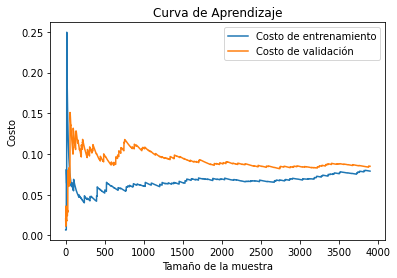

In [86]:
plt.plot(largo,Jtrain, label = "Costo de entrenamiento")
plt.plot(largo,Jcv, label = "Costo de validación")
plt.legend()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño de la muestra")
plt.ylabel("Costo")